About data set

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

### Attribute Information
- 1) age
- 2) sex
- 3) chest pain type (4 values)
- 4) resting blood pressure
- 5) serum cholestoral in mg/dl
- 6) fasting blood sugar > 120 mg/dl
- 7) resting electrocardiographic results (values 0,1,2)
- 8) maximum heart rate achieved
- 9) exercise induced angina
- 10) oldpeak = ST depression induced by exercise relative to rest
- 11) the slope of the peak exercise ST segment
- 12) number of major vessels (0-3) colored by flourosopy
- 13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- 14) target: 0= less chance of heart attack 1= more chance of heart attack

## Import Library

In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,\
plot_confusion_matrix, precision_recall_curve, plot_precision_recall_curve, confusion_matrix, roc_curve, plot_roc_curve, auc
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

## Loading Data

In [323]:
data= pd.read_csv("heart.csv")

In [324]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [325]:
data.shape

(303, 14)

Data Heart ini terdapat 303 baris dan 14 kolom

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Data ini merupakan data numerik, terdiri dari integer dan float

### Missing Value

In [327]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [328]:
for i in data.columns:
    print(f"{[i]} \n {data[i].unique()} \n")

['age'] 
 [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77] 

['sex'] 
 [1 0] 

['cp'] 
 [3 2 1 0] 

['trestbps'] 
 [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 

['chol'] 
 [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 31

Data tersebut tidak terdapat Nan dan unique dari setiap kolom tidak ada yang aneh

### Duplicate

In [329]:
data.duplicated().any()

True

In [330]:
data.duplicated().sum()

1

In [331]:
data.loc[data.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [332]:
data.drop_duplicates(inplace=True)

In [333]:
data.duplicated().sum()

0

Dari data ini terdapat baris yang duplikat, disini saya menghapus data duplikat tersebut

## EDA

In [334]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [335]:
data["age"].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
41    10
64    10
67     9
63     9
43     8
55     8
42     8
61     8
65     8
53     8
45     8
50     7
48     7
46     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
38     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

### AGE

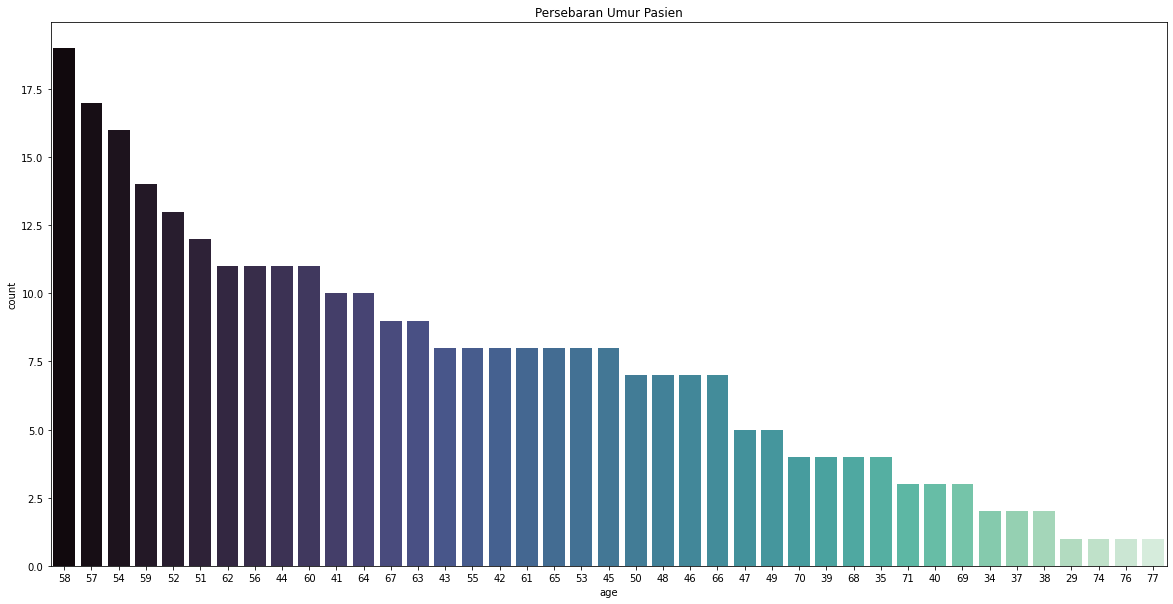

In [336]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["age"], order=data["age"].value_counts().index, palette="mako")
plt.title("Persebaran Umur Pasien")
plt.show()

Umur pasien yang paling banyak terdapat 19 orang yaitu berumur 58, dan rata rata pasien paling banyak berumur 35 tahun keatas

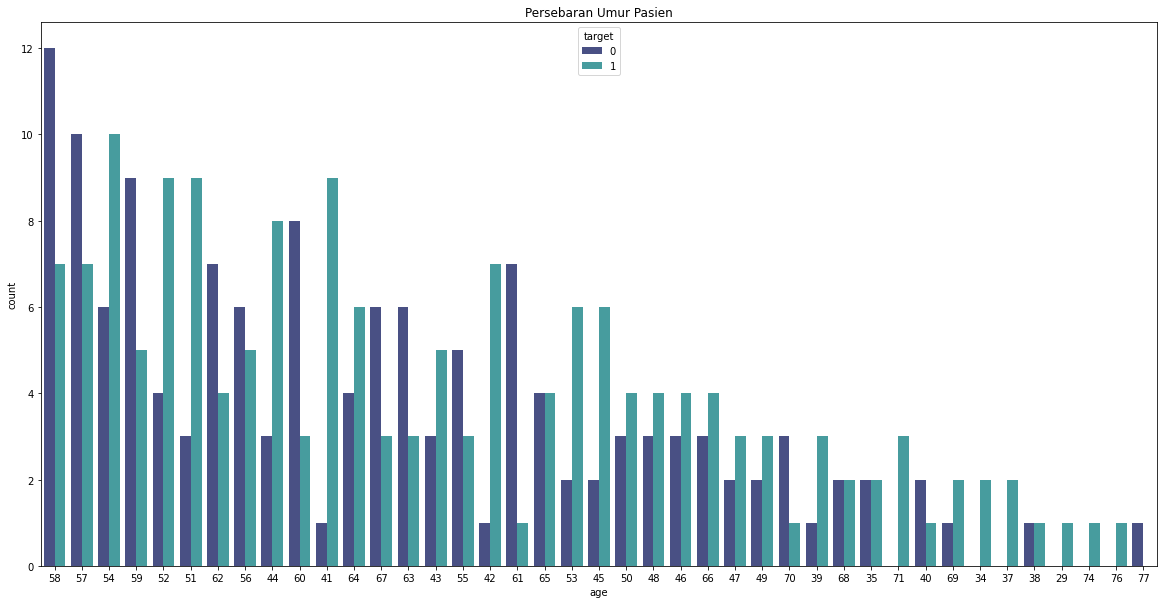

In [337]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["age"], hue=data["target"], order=data["age"].value_counts().index, palette="mako")
plt.title("Persebaran Umur Pasien")
plt.show()

Dari umur pasien, untuk umur 58 tahun, walaupun paling banyak, tetapi lebih banyak yang termasuk kedalam rendah terkena resiko penyakit jantung, untuk yang berumur 54, 52, 51, 41, dan 44, umur dari pasien tersebut yang paling tinggi terkena resiko penyakit jantung, sedangkan pasien umur 71, 34, 37, 29, 74 dan 76, dari semua yang berobat, semuanya terkena resiko penyakit jantung, dan pasien umur 77, belum ditemukan yang terkena resiko penyakit jantung

### Sex

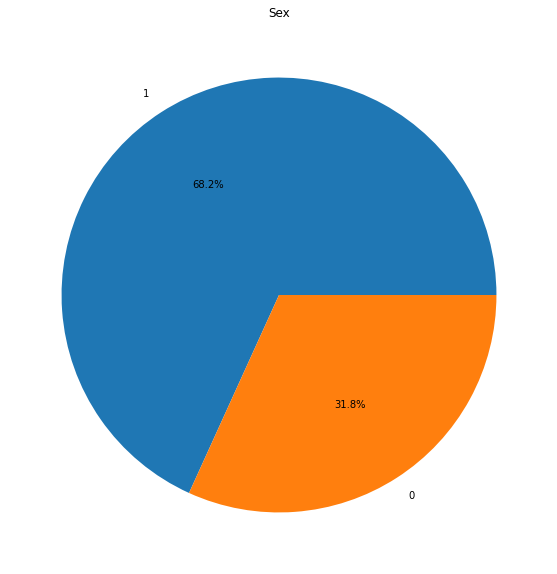

In [338]:
plt.figure(figsize=(10,10))
plt.pie(data["sex"].value_counts(), labels=data["sex"].value_counts().index, autopct='%1.1f%%')
plt.title("Sex")
plt.show()

Kebanyakan pasien berjenis kelamin 1

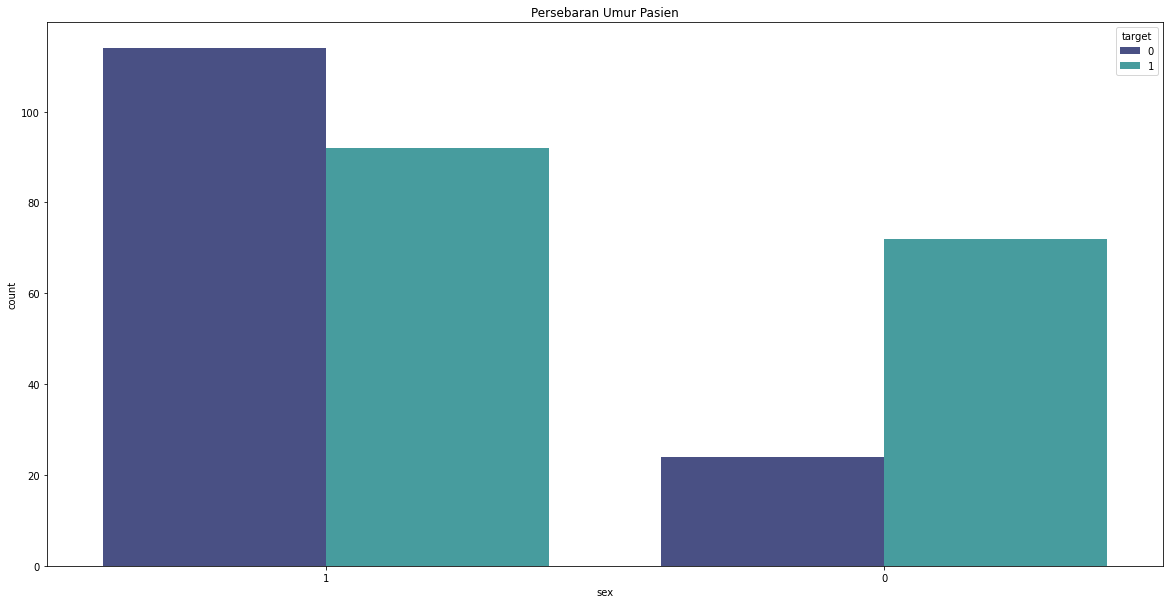

In [339]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["sex"], hue=data["target"], order=data["sex"].value_counts().index, palette="mako")
plt.title("Persebaran Umur Pasien")
plt.show()

Pasien dengan jenis kelamin 1 yang paling banyak beresiko terkena penyakit jantung

### Chest Pain

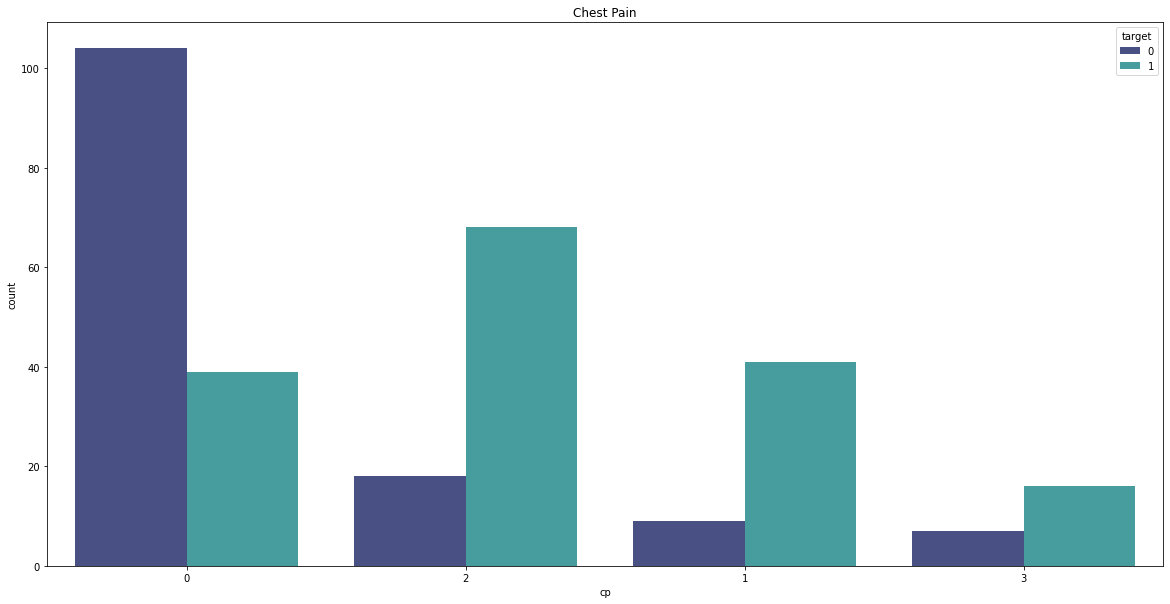

In [340]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["cp"], hue=data["target"], order=data["cp"].value_counts().index, palette="mako")
plt.title("Chest Pain")
plt.show()

Pasien dengan tipe Chest Pain 2 lebih banyak beresiko terkena penyakit jantung, dan tipe 0 lebih rendah terkena resiko penyakit jantung

### Blood Pressure

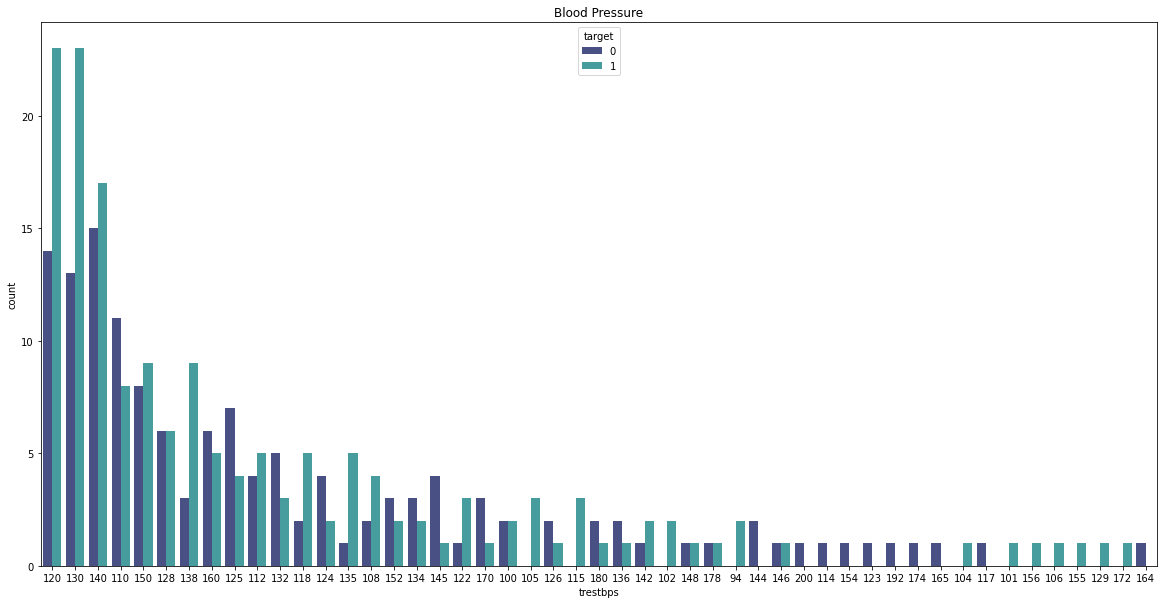

In [341]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["trestbps"], hue=data["target"], order=data["trestbps"].value_counts().index, palette="mako")
plt.title("Blood Pressure")
plt.show()

Pasien dengan tekanan darah 120-150 harus bisa lebih berhati hati karena beresiko terkena penyakit jantung, walaupun tingkat tidak beresiko nya pun cukup tinggi juga

### Blood Sugar

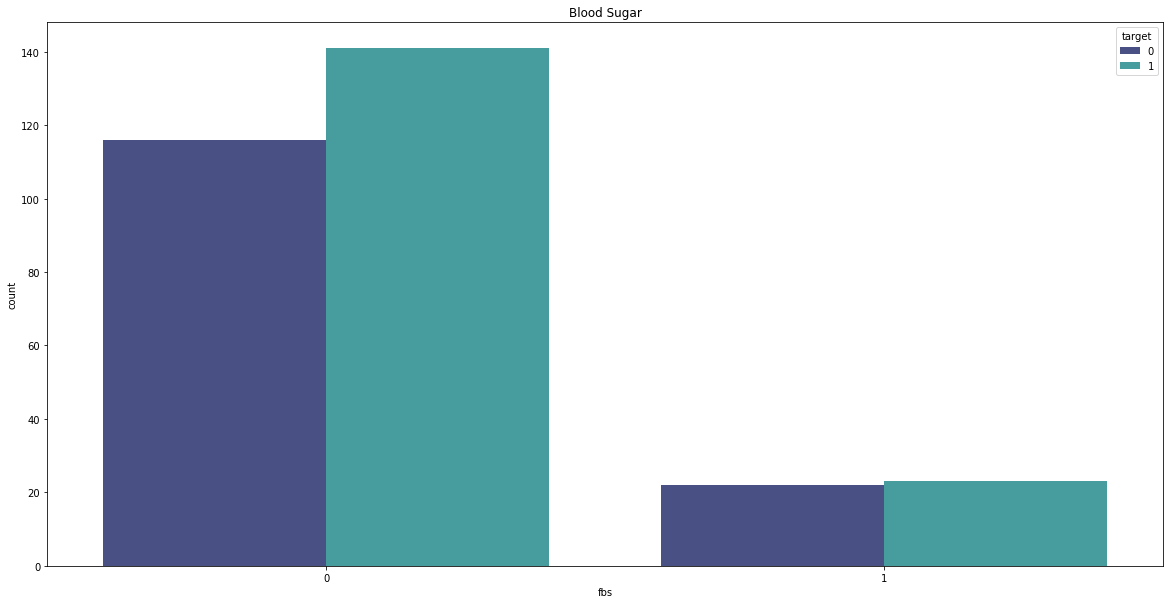

In [342]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["fbs"], hue=data["target"], order=data["fbs"].value_counts().index, palette="mako")
plt.title("Blood Sugar")
plt.show()

Gula darah dengan parameter >120 untuk kategori 0 lebih tinggi terkena resiko penyakit jantung

### Heart Rate

In [343]:
data.groupby("target")["thalach"].value_counts()

target  thalach
0       132        6
        125        5
        144        5
        150        5
        140        4
                  ..
1       188        1
        190        1
        192        1
        194        1
        202        1
Name: thalach, Length: 138, dtype: int64

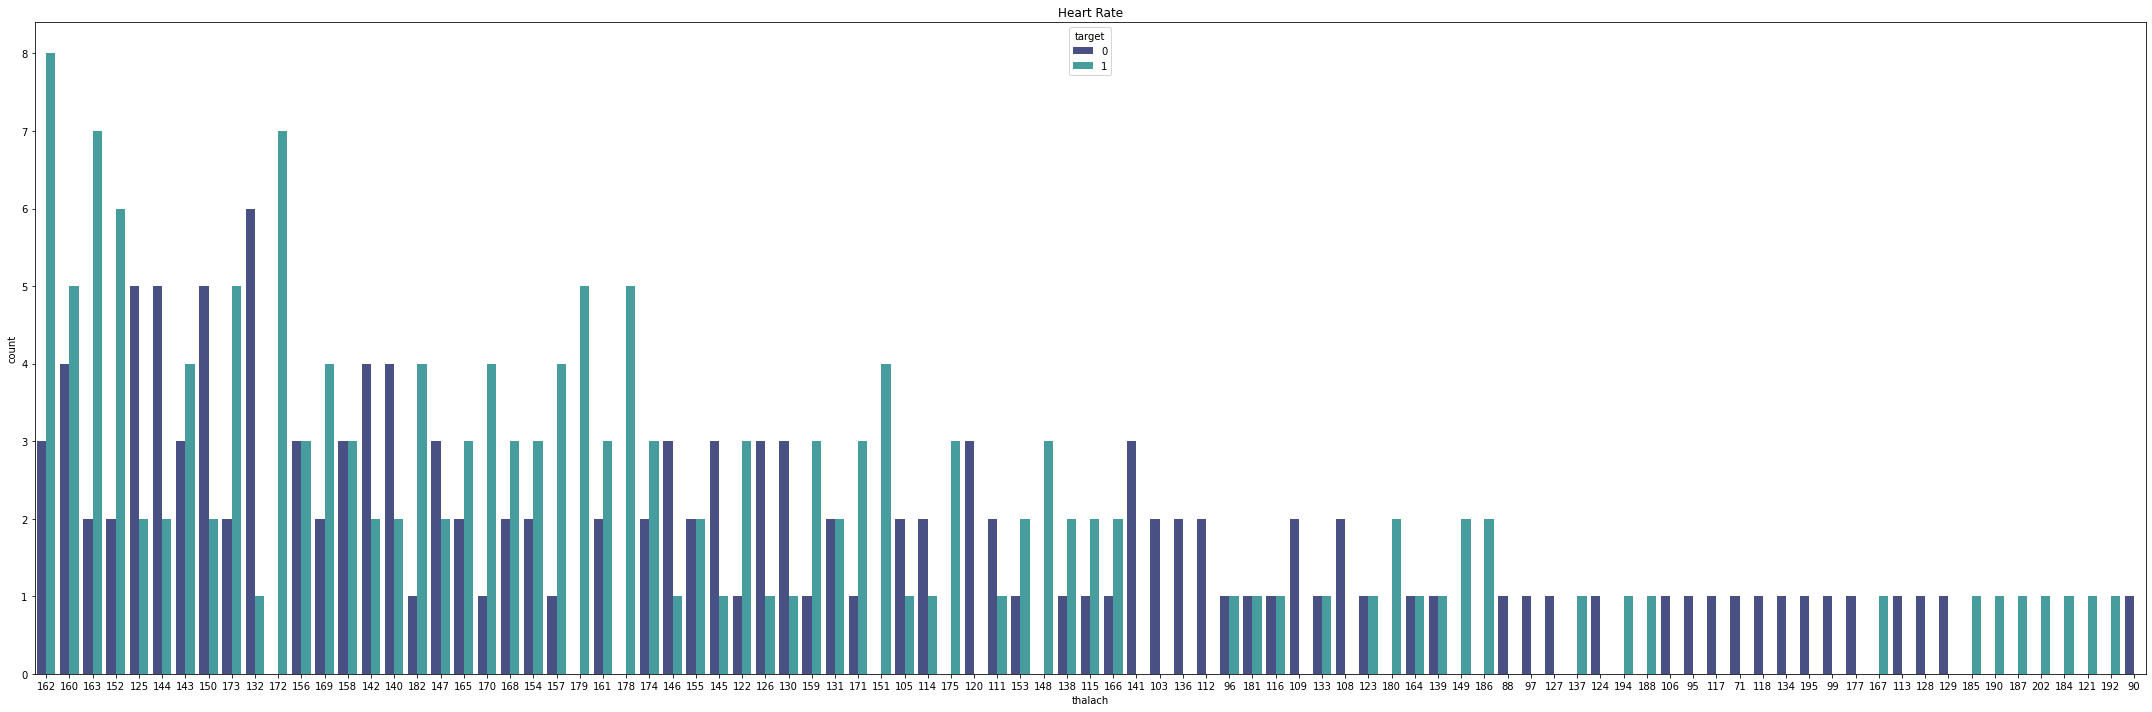

In [344]:
plt.figure(figsize=(30,10))
sns.countplot(x=data["thalach"], hue=data["target"], order=data["thalach"].value_counts().index, palette="mako")
plt.title("Heart Rate")
plt.tight_layout()
plt.show()

Heart rate dengan nilai 160, 162, 163, 172 dari pasien beresiko tinggi terkena penyakit jantung, sedangkan nilai 178, 179 sudah pasti beresiko tinggi terkena penyakit jantung

### Data Distribution

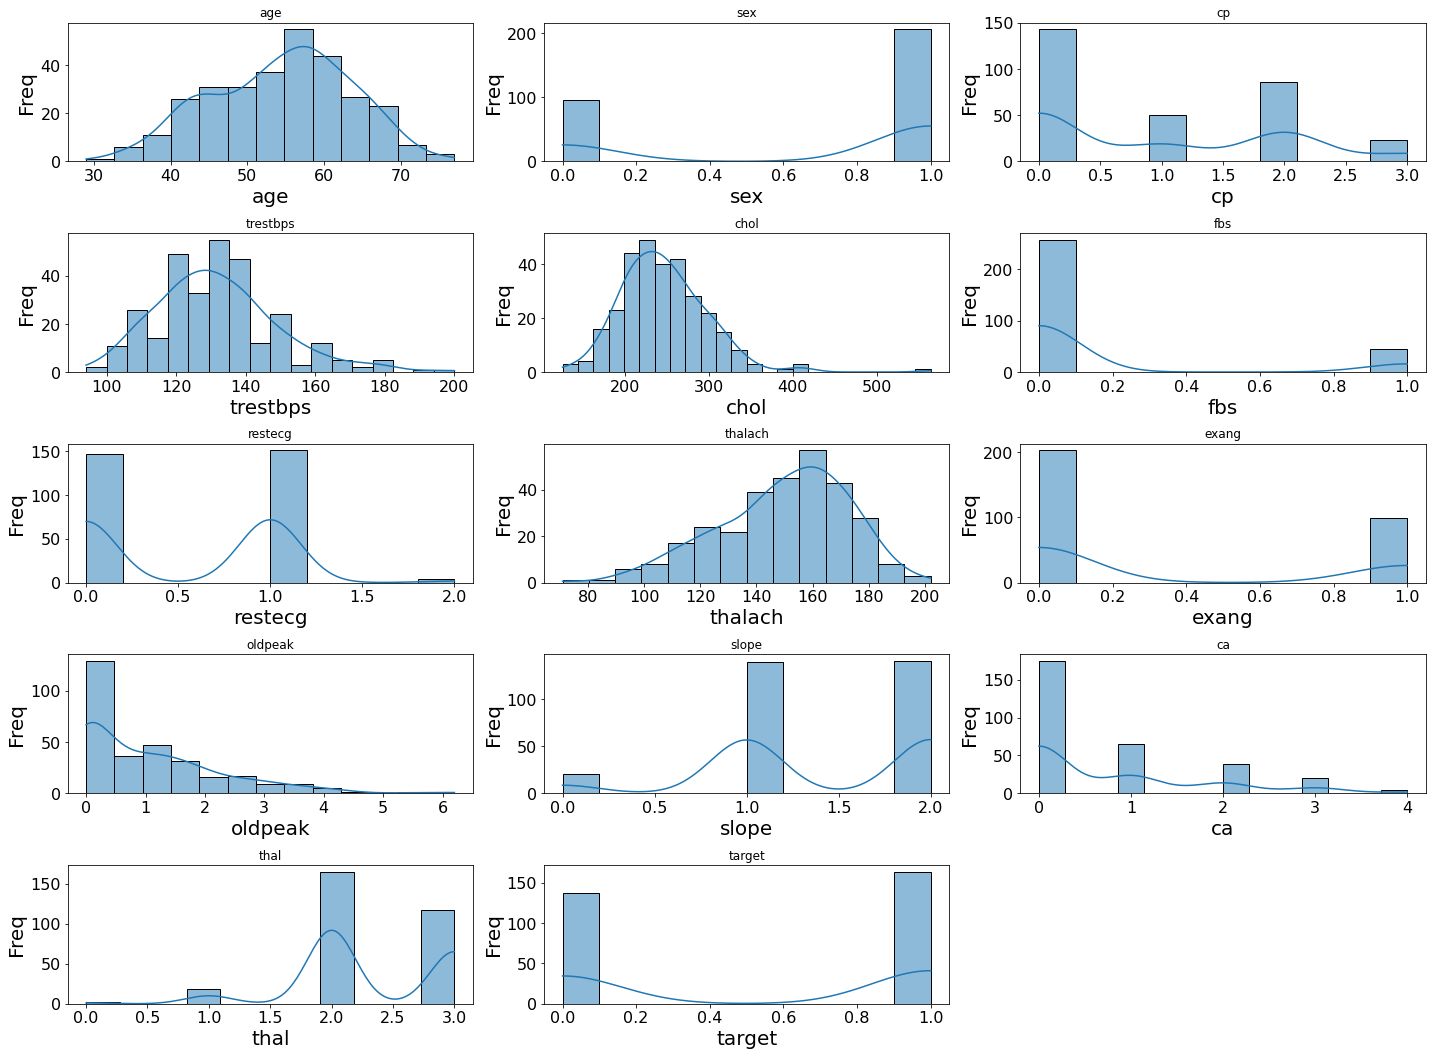

In [345]:
cols = list(data.columns)

plt.figure(figsize=(20, 20))
for i in range(len(cols)):
    plt.subplot(len(cols)//2, 3, i+1)
    ax = sns.histplot(
        data[cols[i]],
        kde = True
    )
    ax.set_xlabel(str(cols[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
    ax.set_title(str(cols[i]))
plt.tight_layout()
plt.show()

Dilihat dari distribusinya, rata2 data tersebut berdistribusi cukup normal

### Target

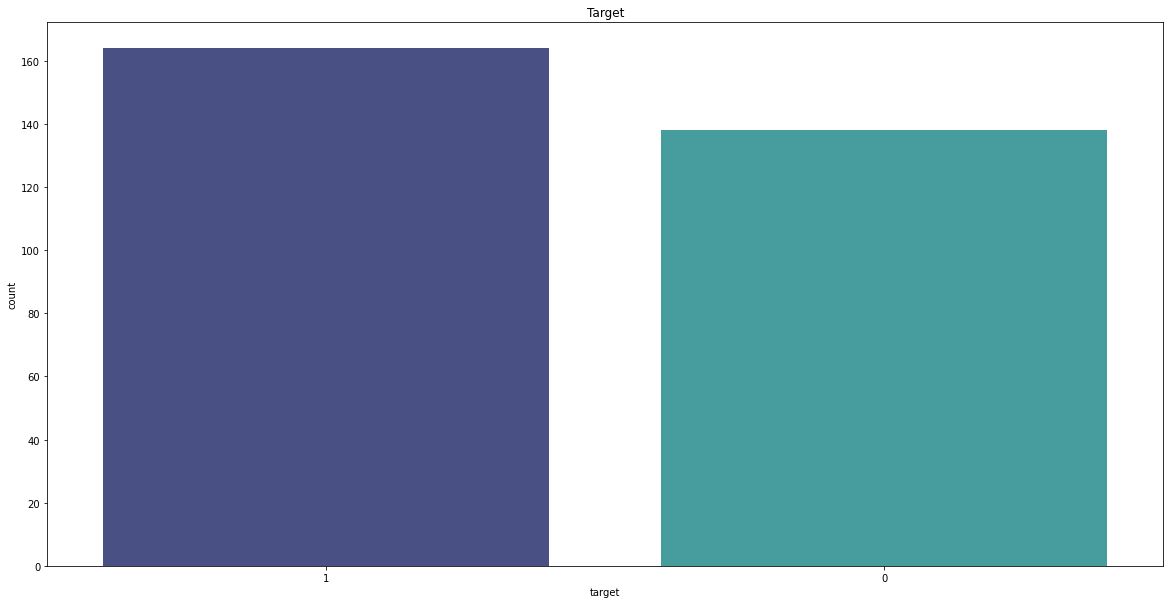

In [346]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["target"], order=data["target"].value_counts().index, palette="mako")
plt.title("Target")
plt.show()

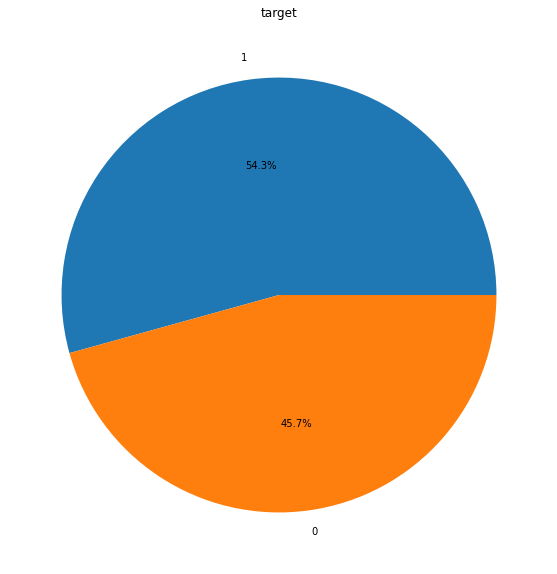

In [347]:
plt.figure(figsize=(10,10))
plt.pie(data["target"].value_counts(), labels=data["target"].value_counts().index, autopct='%1.1f%%')
plt.title("target")
plt.show()

Data target ini sudah cukup ballance karena perbedaan nya tidak jauh

### Data Correlation

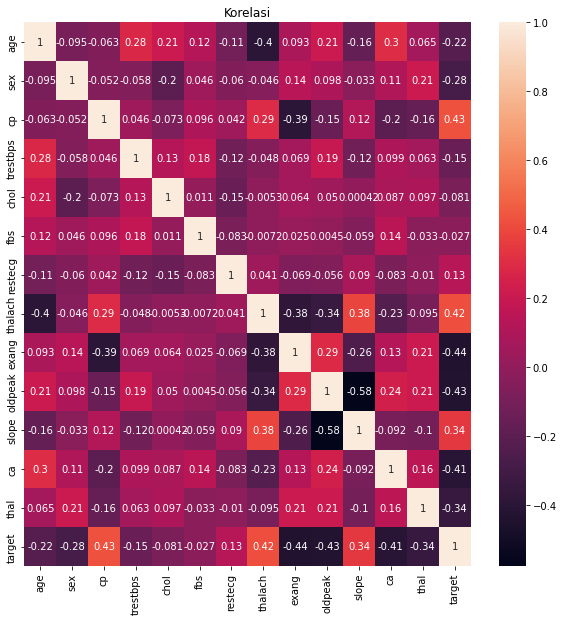

In [348]:
col = list(data.columns)
plt.figure(figsize=(10,10))
sns.heatmap(data[col].corr(), annot=True)
plt.title("Korelasi")
plt.show()

Dilihat dari korelasi, ada beberapa yang memiliki korelasi rendah, yaitu kolom chol dan fbs, disini saya akan menghapus kolon chol, karena fbs ini merupakan tingkat gula darah dan kolom kategorik, jadi saya tidak akan menghapus kolom FBS

## Modeling

In [349]:
data = data.drop(columns=['chol'])

In [350]:
data.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,0,1,163,1,0.6,2,0,2,1


### Split Data

In [351]:
X = data.drop(columns=["target"])
y = data["target"]

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 15)

In [353]:
dtc = DecisionTreeClassifier(random_state=15)
rfc = RandomForestClassifier(random_state=15)

## Default Model

### Decision Tree

In [354]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=15)

In [355]:
y_pred = dtc.predict(X_test)
print("DTC Test Score: ", dtc.score(X_test, y_test))
print("DTC Train Score: ", dtc.score(X_train, y_train))

DTC Test Score:  0.7540983606557377
DTC Train Score:  1.0


In [356]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [357]:
dtc_score = cross_val_score(dtc, X_train, y_train, scoring='precision', cv=5, n_jobs=-1, verbose=1)
print('DTC Val Score:', dtc_score.mean(), "STD: ", dtc_score.std())

DTC Val Score: 0.7828288378288377 STD:  0.0642413238405456


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


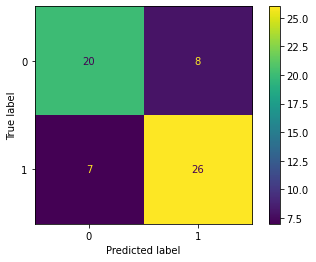

In [358]:
plot_confusion_matrix(dtc, X_test, y_test)

### Random Forrest

In [359]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=15)

In [360]:
y_pred = rfc.predict(X_test)
print("RFC Test Score: ", rfc.score(X_test, y_test))
print("RFC Train Score: ", rfc.score(X_train, y_train))

RFC Test Score:  0.8032786885245902
RFC Train Score:  1.0


In [361]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [362]:
rfc_score = cross_val_score(rfc, X_train, y_train, scoring='precision', cv=5, n_jobs=-1, verbose=1)
print('DTC Val Score:', rfc_score.mean(), "STD: ", rfc_score.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


DTC Val Score: 0.8440157467054018 STD:  0.02893170070774883


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


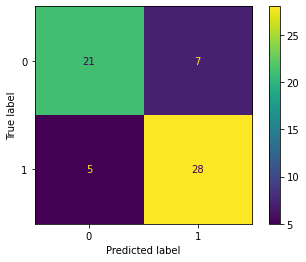

In [363]:
plot_confusion_matrix(rfc, X_test, y_test)

### ROC Curve

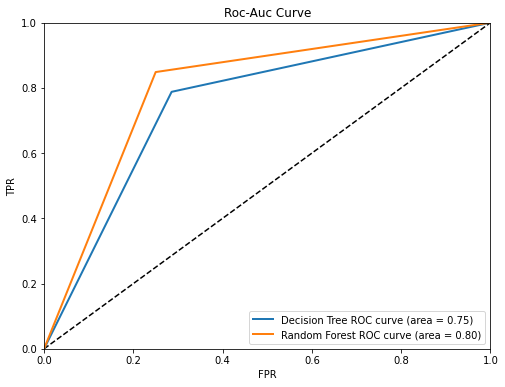

In [364]:
plt.figure(figsize=(8, 6))
plt.title("Roc-Auc Curve")                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('FPR') 
plt.ylabel('TPR')                                                
plt.plot([0, 1], [0, 1], 'k--')

labels=['Decision Tree', 'Random Forest']
for i,j in enumerate([dtc , rfc]):
    y_scores = j.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2, label=labels[i] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right",prop={'size': 10})

## Hyperparameter Tuning

### Decision Tree

In [365]:
dtc.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [366]:
dtc_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth':[10, 30],
    'min_samples_split':[5,10],
    'min_samples_leaf':[2,7]
}

dtc_tuned = GridSearchCV(estimator=dtc, 
                            param_grid=dtc_param, 
                            cv=5, 
                            n_jobs=-1, 
                            scoring='precision',
                           verbose=1)

In [367]:
dtc_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=15), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 30], 'min_samples_leaf': [2, 7],
                         'min_samples_split': [5, 10]},
             scoring='precision', verbose=1)

In [368]:
dtc_tuned.best_score_

0.7932173913043478

In [369]:
dtc_tun = dtc_tuned.best_estimator_

In [370]:
dtc_tuned_score = cross_val_score(dtc_tun, X_train, y_train, scoring='precision', cv=5, n_jobs=-1, verbose=1)
dtc_tuned_score.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.7932173913043478

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


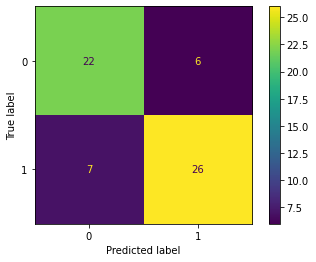

In [371]:
plot_confusion_matrix(dtc_tun, X_test, y_test)

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


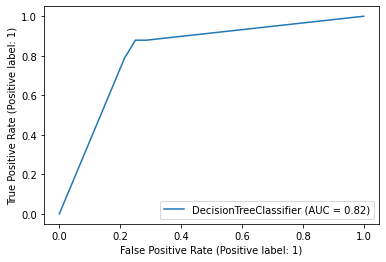

In [372]:
plot_roc_curve(dtc_tun, X_test, y_test)

### Random Forrest

In [373]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [374]:
rfc_param = {'n_estimators': [50, 100],
            'max_depth': [10, 50],
            'max_features': ['auto', 'sqrt']
           }


rfc_tuned = GridSearchCV(estimator=rfc, 
                            param_grid=rfc_param, 
                            cv=5, 
                            n_jobs=-1, 
                            scoring='precision',
                           verbose=1)

In [375]:
rfc_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=15), n_jobs=-1,
             param_grid={'max_depth': [10, 50],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100]},
             scoring='precision', verbose=1)

In [376]:
rfc_tuned.best_score_

0.8457394636015325

In [377]:
rfc_tun = rfc_tuned.best_estimator_

In [378]:
rfc_tuned_score = cross_val_score(rfc_tun, X_train, y_train, scoring='precision', cv=5, n_jobs=-1, verbose=1)
rfc_tuned_score.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


0.8457394636015325

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


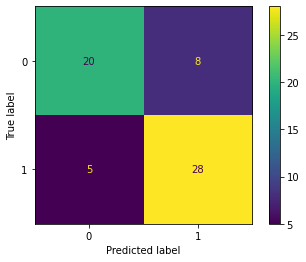

In [379]:
plot_confusion_matrix(rfc_tun, X_test, y_test)

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


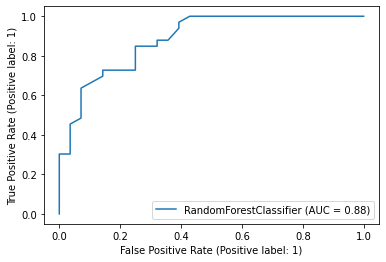

In [380]:
plot_roc_curve(rfc_tun, X_test, y_test)

In [381]:
sdtcv = dtc_score.mean()
sdtcv2 = dtc_tuned_score.mean()
srfcv = rfc_score.mean()
srfcv2 = rfc_tuned_score.mean()


cc = {
    'Before Tuned' : [sdtcv, srfcv],
    'After Tuned': [sdtcv2, srfcv2]
}

_score = pd.DataFrame(data=cc, index=['Decision Tree', 'Random Forest'])
_score


,Before Tuned,After Tuned
Decision Tree,0.782829,0.793217
Random Forest,0.844016,0.845739


Dari perbandingan kedua model ini, Random forest memiliki nilai precision yang lebih baik dari  Decision tree, dan memiliki nilai False Positif yang lebih baik juga, dan dari segi grafik ROC, Random forest memiliki nilai TPR yang lebih baik, kedua model ini memiliki nilai yang lebih baik setelah dilakukan Hyperparameter Tuning, walaupun nilainya tidak berbeda secara signifikan

## Predict

In [382]:
data.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,0,1,163,1,0.6,2,0,2,1


In [383]:
pred = pd.DataFrame([{
    'age': 32,
    'sex': 0,
    'cp': 2,
    'trestbps': 120,
    'fbs' : 1,
    'restecg': 0,
    'thalach': 135,
    'exang': 0,
    'oldpeak': 2.3,
    'slope': 2,
    'ca': 0,
    'thal': 2
}], index=[0])

In [384]:
result = rfc_tun.predict(pred)
if result == 0:
    print('Less Chance of Heart Attack')
else:
    print('More Chance of Heart Attack')

More Chance of Heart Attack


In [385]:
zz = rfc_tun.predict(X_test)

pd.DataFrame({'actual':y_test, 'predict':zz
})

,actual,predict
43,1,1
191,0,0
159,1,1
225,0,0
196,0,1
...,...,...
57,1,1
194,0,1
10,1,1
214,0,0


## Kesimpulan

- Umur pasien yang paling banyak terdapat 19 orang yaitu berumur 58, dan rata rata pasien paling banyak berumur 35 tahun keatas, Dari umur pasien, untuk umur 58 tahun, walaupun paling banyak, tetapi lebih banyak yang termasuk kedalam rendah terkena resiko penyakit jantung, untuk yang berumur 54, 52, 51, 41, dan 44, umur dari pasien tersebut yang paling tinggi terkena resiko penyakit jantung, sedangkan pasien umur 71, 34, 37, 29, 74 dan 76, dari semua yang berobat, semuanya terkena resiko penyakit jantung, dan pasien umur 77, belum ditemukan yang terkena resiko penyakit jantung
- Pasien yang memiliki tekanan darah tinggi dan gula darah tinggi beresiko terkena penyakit jantung
- Pasien dengan Heart Rate tinggi beresiko terkena penyakit jantung
- Model yang digunakan adalah Decision Tree dan Random Forest
- Kedua model ini tidak perlu dilakukan Scalling
- Nilai precision untuk model Random Forest lebih baik daripada model Decision Tree, dan memiliki nilai FP yang lebih baik pula
- Setelah dilakukan Hyperparameter Tuning, kedua model ini memiliki kenaikan score walaupun tidak signifikan, dan Random Forest lebih baik nilainya daripada Decision Tree